<a href="https://colab.research.google.com/github/kumar-mahendra/66DaysOfData/blob/main/Natural_Language_Processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to NLP

#### Dated : 26-01-2021 to 27-01-2021

Getting Familier

In [1]:

import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [2]:

tokenizer = Tokenizer(num_words=100,oov_token="<oov>")  #oov means out_of_vocabulory text which will replace any irrelevent word or word which is new or not known to 
                                                        # model as "<oov>"(here you can take any string but make sure its not in your sequence)

#sample input , a list of sentences 
sentences = ['I am Mahendra Kumar!!!', 'I am currently in my second year of study,at "IIT Goa".','My branch is maths & computing','Want to become a data scientist.','some random stuff xjksdj skdjfs skdjf']

#Lets start 
tokenizer.fit_on_texts(sentences)  
word_index = tokenizer.word_index
print(word_index)

{'<oov>': 1, 'i': 2, 'am': 3, 'my': 4, 'mahendra': 5, 'kumar': 6, 'currently': 7, 'in': 8, 'second': 9, 'year': 10, 'of': 11, 'study': 12, 'at': 13, 'iit': 14, 'goa': 15, 'branch': 16, 'is': 17, 'maths': 18, 'computing': 19, 'want': 20, 'to': 21, 'become': 22, 'a': 23, 'data': 24, 'scientist': 25, 'some': 26, 'random': 27, 'stuff': 28, 'xjksdj': 29, 'skdjfs': 30, 'skdjf': 31}


In [3]:
#generate sequences corresponding to input 
sequences = tokenizer.texts_to_sequences(sentences)
print(*sequences,sep='\n')


[2, 3, 5, 6]
[2, 3, 7, 8, 4, 9, 10, 11, 12, 13, 14, 15]
[4, 16, 17, 18, 19]
[20, 21, 22, 23, 24, 25]
[26, 27, 28, 29, 30, 31]


In [4]:

#generally we fed data in model having same shapes which is not there so we use padding to achive that 

padded_sequences = pad_sequences(sequences)
print("Padding with default settings :")
print(*padded_sequences,sep='\n')

padded_sequences = pad_sequences(sequences,maxlen=6)
print("\nPadding with maxlen parameter :")
print(*padded_sequences,sep='\n')

padded_sequences = pad_sequences(sequences,maxlen=6,padding='post')
print("\nPadding with maxlen & post_padding technique :")
print(*padded_sequences,sep='\n')

padded_sequences = pad_sequences(sequences,maxlen=6,padding='post',truncating='post')
print("\nPadding with above two + truncating settings :")
print(*padded_sequences,sep='\n')


Padding with default settings :
[0 0 0 0 0 0 0 0 2 3 5 6]
[ 2  3  7  8  4  9 10 11 12 13 14 15]
[ 0  0  0  0  0  0  0  4 16 17 18 19]
[ 0  0  0  0  0  0 20 21 22 23 24 25]
[ 0  0  0  0  0  0 26 27 28 29 30 31]

Padding with maxlen parameter :
[0 0 2 3 5 6]
[10 11 12 13 14 15]
[ 0  4 16 17 18 19]
[20 21 22 23 24 25]
[26 27 28 29 30 31]

Padding with maxlen & post_padding technique :
[2 3 5 6 0 0]
[10 11 12 13 14 15]
[ 4 16 17 18 19  0]
[20 21 22 23 24 25]
[26 27 28 29 30 31]

Padding with above two + truncating settings :
[2 3 5 6 0 0]
[2 3 7 8 4 9]
[ 4 16 17 18 19  0]
[20 21 22 23 24 25]
[26 27 28 29 30 31]


In [5]:
# Since Our word_index dictionary contains a lot of stopwords which have no meaning in themselves and hence not required while doing NLP 

#Here is list of commonly used stopwords Rest you know how to exclude this words from Sentence using python !! (In case you don't know don't worry I will be doing that in upcoming Real World Example below)
Stopwords = ['a', 'about', 'above', 'after', 'again', 'against', 'all', 'am', 'an', 'and', 'any', 'are', 'aren', 'not', 'as', 'at', 'be', 'because', 'been', 'before', 'being',\
             'below', 'between', 'both', 'but', 'by', 'can', 'not', 'cannot', 'could', 'couldn', 'not', 'did', 'didn', 'not', 'do', 'does', 'doesn', 'not', 'doing', 'don', 'not',\
             'down', 'during', 'each', 'few', 'for', 'from', 'further', 'had', 'hadn', 'not', 'has', 'hasn', 'not', 'have', 'haven', 'not', 'having', 'he', 'he', 'had', 'he', 'will',\
             'he', 'is', 'her', 'here', 'here', 'is', 'hers', 'herself', 'him', 'himself', 'his', 'how', 'how', 'is', 'i', 'i', 'had', 'i', 'will', 'i', 'am', 'i', 'have', 'if', 'in', \
             'into', 'is', 'isn', 'not', 'it', 'it', 'is', 'its', 'itself', 'let', 'is', 'me', 'more', 'most', 'mustn', 'not', 'my', 'myself', 'no', 'nor', 'not', 'of', 'off', 'on', 'once',\
             'only', 'or', 'other', 'ought', 'our', 'ours', 'ourselves', 'out', 'over', 'own', 'same', 'shan', 'not', 'she', 'she', 'had', 'she', 'will', 'she', 'is', 'should', 'shouldn',\
             'not', 'so', 'some', 'such', 'than', 'that', 'that', 'is', 'the', 'their', 'theirs', 'them', 'themselves', 'then', 'there', 'there', 'is', 'these', 'they', 'they', 'had', \
             'they', 'will', 'they', 'are', 'they', 'have', 'this', 'those', 'through', 'to', 'too', 'under', 'until', 'up', 'very', 'was', 'wasn', 'not', 'we', 'we', 'had', 'we', 'will',\
             'we', 'are', 'we', 'have', 'were', 'weren', 'not', 'what', 'what', 'is', 'when', 'when', 'is', 'where', 'where', 'is', 'which', 'while', 'who', 'who', 'is', 'whom', 'why',\
             'why', 'is', 'with', 'won', 'not', 'would', 'wouldn', 'not', 'you', 'you', 'had', 'you', 'will', 'you', 'are', 'you', 'have', 'your', 'yours', 'yourself', 'yourselves', 'MySQL', 'Stopw']

In [6]:
# Second Common thing we encounter is that in real life people use shorthands like I've, I'am, we'll etc. etc. and Also there 
#could be  puncutation mark which are of  not use at all . To handle that scenerios , I have written these two functions

#To make shorhand like <I've> to their full form <I have > .These are some that I am familier with 
def clean_sentence(sentence):

  # A little bit sentence cleaning first to handle scenerio like his-her (note if dash is removed then 'hisher' is a nonsense word) by adding comma before and after such symbols . 
  sentence = sentence.replace('-',' - ')
  sentence = sentence.replace('.',' . ')
  sentence = sentence.replace('/',' / ')
  sentence = sentence.replace(',', ' , ')  # and so on.....as much as you like but these are a few common ones

  Words=sentence.split()
  sentence = ''
  for word in Words:
    word = word.replace("'s",' is')
    word = word.replace("'nt",' not')
    word = word.replace("n't",' not')
    word = word.replace("'d", ' had')
    word = word.replace("'ll",' will')
    word = word.replace("'m",' am')
    word = word.replace("'ve",' have')
    word = word.replace("'re", ' are')
    sentence = sentence + word + ' '
  return sentence 


#To remove the punctuation marks (if any) in sentences
def remove_punctuations(sentence):
  import string
  table = str.maketrans('','',string.punctuation)
  Words = sentence.split()
  sentence = ''
  for word in Words : 
    word = word.translate(table)
    sentence = sentence + word+ ' '
  return sentence


In [7]:
## One last scenerio which comes in my mind is web_scrapping. In HTML codes there are syntax like <h>, <div> etc. which are of no use. To remove those there is a something called Beautiful Soap. 

#For example :-

html_code = """
            <!DOCTYPE html>
            <html>
            <body>

            <h1>My First Heading</h1>

            <p>My first paragraph.</p>

            </body>
            </html>
"""

from bs4 import BeautifulSoup
soup = BeautifulSoup(html_code)
sentence = soup.get_text()
print(sentence)

## With this we will now take up a Real World Data and Dirty our hands to make that data clean !! LETS GO---->



My First Heading
My first paragraph.





In [8]:
#--------------------------------------------------------------------### A REAL WORLD EXMAPLE ####----------------------------------------------------------------------------------------------------------

In [9]:
#Here we will use a  dataset available in tensorflow_datasets which is "IMDb" (Internet Movies Databases) containing various movies reviews and corresponding sentiment 'Good/Bad'
# We will only extract words which are present most frequently with some filtering techniques we know now
#Importing the dataset IMDb 

import tensorflow_datasets as tfds 
data = tfds.as_numpy(tfds.load('imdb_reviews',split='train'))

#In this dataset there are 50,000 reviews!!

Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incomplete1NMPBW/imdb_reviews-train.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incomplete1NMPBW/imdb_reviews-test.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incomplete1NMPBW/imdb_reviews-unsupervised.tfrecord


Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0. Subsequent calls will reuse this data.


In [10]:
movie_reviews = []
for item in data : 
  review = str(item['text'].decode('UTF-8').lower())
  soup = BeautifulSoup(review)
  review = soup.get_text()
  review = clean_sentence(review)
  review = remove_punctuations(review)
  movie_reviews.append(review)

In [11]:
movie_reviews[0]

'this was an absolutely terrible movie  do not be lured in by christopher walken or michael ironside  both are great actors  but this must simply be their worst role in history  even their great acting could not redeem this movie is ridiculous storyline  this movie is an early nineties us propaganda piece  the most pathetic scenes were those when the columbian rebels were making their cases for revolutions  maria conchita alonso appeared phony  and her pseudo  love affair with walken was nothing but a pathetic emotional plug in a movie that was devoid of any real meaning  i am disappointed that there are movies like this  ruining actor is like christopher walken is good name  i could barely sit through it  '

In [12]:
# Now do some tokenization and remove the stopwords from these cleaned sentences :>

# removing the stopwords from sentences 
updated = []
for review in movie_reviews : 
  sentence = ''
  review = review.split()
  for word in review : 
    if word not in Stopwords :    #This has been defined initially at the start You can go back  and check if you don't remember 
      sentence = sentence + word + ' '
  updated.append(sentence)
movie_reviews = updated 

#Tokenization 
tokenizer = Tokenizer(num_words=5000,oov_token='<oov>')
tokenizer.fit_on_texts(movie_reviews)
word_index = tokenizer.word_index
sequences = tokenizer.texts_to_sequences(movie_reviews)  # You can pass some other list of sentences here too to get their tokens. If some word in not present in word_index it will shows <oov>


In [13]:
movie_reviews[0]  ## See yourself how many stopwords were there ....phww 

'absolutely terrible movie lured christopher walken michael ironside great actors must simply worst role history even great acting redeem movie ridiculous storyline movie early nineties us propaganda piece pathetic scenes columbian rebels making cases revolutions maria conchita alonso appeared phony pseudo love affair walken nothing pathetic emotional plug movie devoid real meaning disappointed movies like ruining actor like christopher walken good name barely sit '

In [14]:
## Coverting sequences into rectangular matrix 

updated_sequences = pad_sequences(sequences,padding='post')
print('Shape of Matrix which will be fed in model : ',len(updated_sequences),'x',len(updated_sequences[0]))


#Note :
## This model can be futhur imporved by removing the words which have no meaning and are some random text , That we will see later.. Till then bye!

Shape of Matrix which will be fed in model :  25000 x 1422


In [15]:
print('Some Top Words present in Reviews are :',list(word_index.keys())[1:20])  #IN decreasing order of frequency


Some Top Words present in Reviews are : ['movie', 'film', 'one', 'like', 'just', 'good', 'time', 'even', 'story', 'really', 'see', 'well', 'much', 'get', 'bad', 'people', 'also', 'great', 'first']


In [16]:
# Decoder can be used convert these sequences back to review given except the text which was not recognized
Decoder = {}
for key,value in word_index.items():
  Decoder[value]=key


In [17]:
## Lets give a review and see its sequence :
review = 'I saw that movie yesterday and I find that very boring still I find other way which is NLP very interesting lets solve some problems in that'
seq = tokenizer.texts_to_sequences([review])
print(seq)

[[1, 112, 1, 2, 3674, 1, 1, 71, 1, 1, 243, 46, 1, 71, 1, 22, 1, 1, 1, 1, 114, 1476, 3195, 1, 574, 1, 1]]


In [18]:
decoded_sentence = ''
for x in seq[0] : 
  if x != 1:
    decoded_sentence = decoded_sentence + Decoder[x]+ ' '
print(decoded_sentence)

saw movie yesterday find boring still find way interesting lets solve problems 


### Sarcastic News Headline or NOT : Sentiment Analysis using Tensorflow and NLP techniques

In [ ]:
#you can read csv files using pandas read_csv method . Simple isn't it? 
import pandas as pd 
data = pd.read_csv(r'ufo.csv')
data.head()

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00
3,Abilene,NaN,DISK,KS,6/1/1931 13:00
4,New York Worlds Fair,NaN,LIGHT,NY,4/18/1933 19:00


In [ ]:
#Now if you want any column as training column lets say City column here then just select it like this

train = data['City'].tolist()
print(train[:10])

['Ithaca', 'Willingboro', 'Holyoke', 'Abilene', 'New York Worlds Fair', 'Valley City', 'Crater Lake', 'Alma', 'Eklutna', 'Hubbard']


In [19]:
#loading json file 
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sarcasm.json \
    -O /tmp/sarcasm.json

#Now we will see how to import JSON Files . pandas currently do not load JSON files directly . 
# for that we will use json library in python and make our life easier

import json
import numpy as np

with open('/tmp/sarcasm.json','r') as f:
  Data = json.load(f)

#data[:5]


--2021-02-01 19:29:02--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sarcasm.json
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.213.128, 173.194.215.128, 173.194.216.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.213.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5643545 (5.4M) [application/json]
Saving to: ‘/tmp/sarcasm.json’

/tmp/sarcasm.json   100%[===================>]   5.38M  --.-KB/s    in 0.05s   

2021-02-01 19:29:02 (105 MB/s) - ‘/tmp/sarcasm.json’ saved [5643545/5643545]



In [20]:
# Make list of headlines
data = [x['headline'] for x in Data]


In [33]:

# Data Cleaning and Removing Stopwords

#data cleaning 
for i in range(len(data)) : 
  sentence = clean_sentence(data[i])
  #print(sentence)
  sentence = remove_punctuations(sentence)
  #print(sentence)
  data[i]=sentence

# removing the stopwords from sentences 
updated = []
for x in data : 
  sentence = ''
  x = x.split()
  for word in x : 
    if word not in Stopwords :    #This has been defined initially at the start You can go back  and check if you don't remember 
      sentence = sentence + word + ' '
  updated.append(sentence) 
data = updated
updated=[]


#----------------------------------------------------------------------------------------------------------

#Till now no hyperparameter tuning was involved but now we will need to do some tuning 

# Now lets check how acccrate our model is right now 
import matplotlib.pyplot as plt 
%matplotlib inline

def draw_graphs(history,epoch):
    print(history.history.keys())
    epochs = [i for i in range(epoch)]
    #Accuracy training vs Validation 
    plt.plot(epochs,history.history['accuracy'])
    plt.plot(epochs,history.history['val_accuracy'])
    plt.title("Accuracy : Training vs Validation")
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.show()

    #Loss Training vs Validation
    plt.title("Loss : Training vs Validation")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.plot(epochs,history.history['loss'])
    plt.plot(epochs,history.history['val_loss'])
    plt.show()

def training_model(vocab_size,embedding_size,epoch):

    tokenizer = Tokenizer(num_words = vocab_size, oov_token= '<oov>')

    #Training and testing split

    training_heading = []
    testing_heading = []

    #size of data file ~27000 
    #we take training size = 80% i.e 21000
    training_size = 21000
    for x in data[:training_size] : 
      training_heading.append(x)

    for x in data[training_size:] : 
      testing_heading.append(x)

    #Tokenization and padding
    tokenizer.fit_on_texts(training_heading)
    word_index = tokenizer.word_index
    training_sequences = tokenizer.texts_to_sequences(training_heading)
    training_padded = pad_sequences(training_sequences,padding= 'post',maxlen = 15,truncating='post')

    testing_sequences = tokenizer.texts_to_sequences(testing_heading)
    testing_padded = pad_sequences(testing_sequences,padding= 'post',maxlen = 15,truncating='post')

    #Now we have cleaned training and testing data  so lets move to creating a model 

    #first convert list into numpy array as required in input
    import numpy as np
    training_padded = np.array(training_padded)
    training_labels = np.array([x['is_sarcastic'] for x in Data[:training_size]])
    testing_padded = np.array(testing_padded)
    testing_labels = np.array([x['is_sarcastic'] for x in Data[training_size:]])

    #Model Declaration
    """
    #Model 1 
    model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_size),  #create array of 16 numbers for each word , here we have 10000 words in vocabulory 
                                            #check by print(len(word_index)==10000) 
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(10, activation='relu',kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.Dense(1, activation='sigmoid')
    ])

    model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

    print(model.summary())
    history = model.fit(training_padded,training_labels,epochs=epoch,validation_data=(testing_padded,testing_labels),verbose=0)   

    """

    """
    #Model-2

    #using pretrained model 
    import tensorflow_hub as hub
    hub_layer = hub.KerasLayer("https://tfhub.dev/google/tf2-preview/gnews-swivel-20dim/1",output_shape=[20],input_shape =[],
                           dtype=tf.string, trainable=False)
    model = tf.keras.Sequential([
                            hub_layer,
                            tf.keras.layers.Dense(16, activation='relu'),
                            tf.keras.layers.Dense(1, activation='sigmoid')
                            ])
  
    adam = tf.keras.optimizers.Adam(learning_rate=0.0001, beta_1=0.9,beta_2=0.999, amsgrad=False)

    model.compile(loss='binary_crossentropy',optimizer=adam,metrics=['accuracy'])

    print(model.summary())
    history = model.fit(np.array(training_heading),training_labels,epochs=epoch,validation_data=(np.array(testing_heading),testing_labels),verbose=0)
    """

    
    #Model-3

    #Recurrent neural network particularly LSTM

    model = tf.keras.models.Sequential([
                                        tf.keras.layers.Embedding(vocab_size,embedding_size),
                                        tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(embedding_size,
                                                                                           return_sequences=True)),
                                        tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(embedding_size)),
                                        tf.keras.layers.Dense(24,activation='relu'),
                                        tf.keras.layers.Dense(1,activation='sigmoid')
    ])

    adam = tf.keras.optimizers.Adam(learning_rate=0.000008, beta_1=0.9,beta_2=0.999, amsgrad=False)

    model.compile(loss='binary_crossentropy',optimizer=adam,metrics=['accuracy'])
    print(model.summary())
    history = model.fit(training_padded,training_labels,epochs=epoch,validation_data=(testing_padded,testing_labels),verbose=0)
    draw_graphs(history,epoch)

    #For Vizualization of Embeddings using online tool "Projector Embedding"

    reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
    e = model.layers[0]
    weights = e.get_weights()[0]
    print("\nweights shape : ",weights.shape)

      ## Code to generate tsv files -(vector dimension and meta-data file) that will be used by embedding projector 
    import io
    out_v = io.open('vecs.tsv', 'w', encoding='utf-8')
    out_m = io.open('meta.tsv', 'w', encoding='utf-8')
    for word_num in range(1, vocab_size):
      word = reverse_word_index[word_num]
      embeddings = weights[word_num]
      out_m.write(word + "\n")
      out_v.write('\t'.join([str(x) for x in embeddings]) + "\n")
    out_v.close()
    out_m.close()

    try:
      from google.colab import files
    except ImportError:
      pass
    else:
      files.download('vecs.tsv')
      files.download('meta.tsv')


Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, None, 7)           14000     
_________________________________________________________________
bidirectional_8 (Bidirection (None, None, 14)          840       
_________________________________________________________________
bidirectional_9 (Bidirection (None, 14)                1232      
_________________________________________________________________
dense_10 (Dense)             (None, 24)                360       
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 25        
Total params: 16,457
Trainable params: 16,457
Non-trainable params: 0
_________________________________________________________________
None
dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


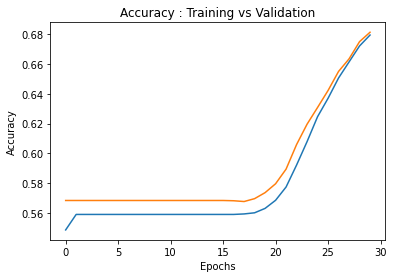

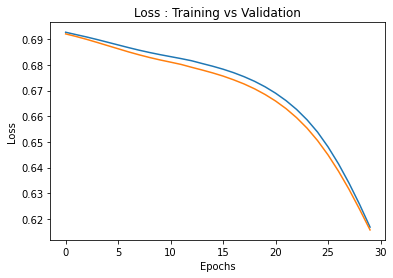


weights shape :  (2000, 7)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [34]:
model = training_model(2000,7,30)

OrderedDict([('movie', 43908), ('film', 40076), ('one', 26724), ('like', 20241), ('just', 17745), ('good', 15109), ('time', 12682), ('even', 12618), ('story', 11951), ('really', 11722), ('see', 11449), ('well', 10612), ('much', 9752), ('get', 9297), ('bad', 9282), ('people', 9268), ('also', 9135), ('great', 9038), ('first', 9036), ('made', 8350), ('way', 8013), ('make', 8010), ('movies', 7644), ('think', 7286), ('characters', 7145), ('character', 7012), ('watch', 6952), ('two', 6893), ('films', 6879), ('many', 6670), ('seen', 6664), ('life', 6611), ('plot', 6568), ('never', 6477), ('acting', 6476), ('love', 6445), ('little', 6432), ('best', 6404), ('show', 6277), ('know', 6155), ('ever', 5976), ('man', 5923), ('better', 5725), ('end', 5636), ('still', 5611), ('say', 5385), ('scene', 5366), ('scenes', 5202), ('go', 5136), ('something', 5055), ('back', 4962), ('real', 4712), ('watching', 4599), ('now', 4571), ('though', 4544), ('old', 4519), ('thing', 4513), ('years', 4504), ('actors', 4

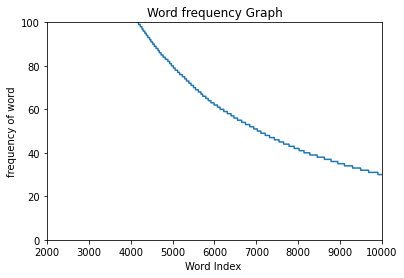

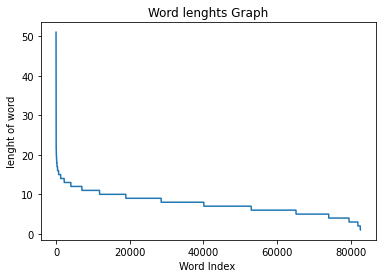

In [23]:
# You can experiment with parameters and see result .

#Reason : We have chosen embedded size to be 15 because around 80% words in tokenizer's word_index 
#         are having very low frequency (<20 times)

#         Also you can see below graph that word after 2000 are of very low frequency thats why we keep 
#         vocab_size equal to 2000 

wc = tokenizer.word_counts
from collections import OrderedDict
newlist = (OrderedDict(sorted(wc.items(), key=lambda t: t[1], reverse=True)))
print(newlist)

xs=[]
ys=[]
curr_x = 1
for item in newlist:
 xs.append(curr_x)
 curr_x=curr_x+1
 ys.append(newlist[item])
plt.title("Word frequency Graph")
plt.xlabel("Word Index ")
plt.ylabel("frequency of word")
plt.plot(xs,ys)
plt.axis([2000,10000,0,100])
plt.show()


lenghts = []
yss = []
l = len(xs)
for x in newlist : 
  yss.append(len(x))
yss = sorted(yss,reverse=True)
plt.title("Word lenghts Graph")
plt.xlabel("Word Index ")
plt.ylabel("lenght of word")
plt.plot(xs,yss)
plt.show()


### Results : 
###       Model Accuracy Training : 83%
###       Model Accracy Validation:76 %

### Recurrent Neural Networks 


#### LSTMs aka long short-term memory